# BAIT 509 Assignment 3: Logistic Regression and Evaluation Metrics  

__Evaluates__: Lectures 6 - 9. 

__Rubrics__: Your solutions will be assessed primarily on the accuracy of your coding, as well as the clarity and correctness of your written responses. The MDS rubrics provide a good guide as to what is expected of you in your responses to the assignment questions and how the TAs will grade your answers. See the following links for more details:

- [mechanics_rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_mech.md): submit an assignment correctly.
- [accuracy rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_accuracy.md): evaluating your code.
- [reasoning rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_reasoning.md): evaluating your written responses.
- [autograde rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_autograde.md): evaluating questions that are either right or wrong (can be done either manually or automatically).

## Tidy Submission 
rubric={mechanics:2}

- Complete this assignment by filling out this jupyter notebook.
- Any place you see `...` or `____`, you must fill in the function, variable, or data to complete the code.
- Use proper English, spelling, and grammar.
- You will submit two files on Canvas:
    1. This jupyter notebook file containing your responses ( an `.ipynb` file); and,
    2. An `.html` file of your completed notebook that will render directly on Canvas without having to be downloaded.
        - To generate this html file you can click `File` -> `Export Notebook As` -> `HTML` in JupyterLab or type the following into a terminal `jupyter nbconvert --to html_embed assignment.ipynb`).
    
Submit your assignment through UBC Canvas by the deadline listed there.

## Introduction and learning goals <a name="in"></a>
<hr>

Welcome to the assignment! In this assignment, you will practice:

- Explain components of a confusion matrix.
- Define precision, recall, and f1-score and use them to evaluate different classifiers.
- Identify whether there is class imbalance and whether you need to deal with it.
- Explain `class_weight` and use it to deal with data imbalance.
- Apply different scoring functions with `cross_validate` and `GridSearchCV` and `RandomizedSearchCV`.
- Explain the general intuition behind linear models.
- Explain the `fit` and `predict` paradigm of linear models.
- Use `scikit-learn`'s `LogisticRegression` classifier.
    - Use `fit`, `predict` and `predict_proba`.   
    - Use `coef_` to interpret the model weights.
- Explain the advantages and limitations of linear classifiers. 


## Exercise 1:  Precision, recall, and f1 score "by hand" (without `sklearn`) <a name="1"></a>
<hr>


Consider the problem of predicting whether a new product will be successful or not and is worth investing in. Below are confusion matrices of two machine learning models: Model A and Model B. 

##### Model A
|    Actual/Predicted         | Predicted successful| Predicted not successful |
| :-------------------------- | ------------------: | -----------------------: |
| **Actually successful**     | 3                   | 5                        |
| **Actually not successful** | 6                   | 96                       |
 

##### Model B
|    Actual/Predicted         | Predicted successful| Predicted not successful |
| :-------------------------- | ------------------: | -----------------------: |
| **Actually successful**     | 6                   |                        14 |
| **Actually not successful** | 0                  |                       90 |  

### 1.1 Positive vs. negative class
rubric={autograde:1, reasoning:1}

<div class="alert alert-info" style="color:black">
    
Precision, recall, and f1 score depend crucially upon which class is considered "positive", that is the thing you wish to find. In the example above, which class ( `Actually successful` or `Actually not successful`)  is likely to be the "positive" class and why?

Save the label name in a string object named `answer_1_1`.

</div>

Actually successful is likely to be the *positive* class, because it is the target we are going to find.

In [68]:
answer_1_1 = 'Actually successful'

### 1.2 Accuracy
rubric={autograde:2}

<div class="alert alert-info" style="color:black">

Calculate accuracies for Model A and Model B. 

</div>

In [69]:
model_a_acc = (3+ 96) / (3+5+6+96)
model_b_acc = (6+90) / (6+14+90)
display(model_a_acc)
display(model_b_acc)

0.9

0.8727272727272727

### 1.3 Which model would you pick? 
rubric={reasoning:1}

<div class="alert alert-info" style="color:black">

Which model would you pick simply based on the accuracy metric? 
   
</div>

***A***

### 1.4 Model A - Precision, recall, f1-score
rubric={accuracy:1.5}

<div class="alert alert-info" style="color:black">

Calculate precision, recall, f1-score for **Model A** by designating the appropriate fraction to objects named `a_precision`, `a_recall` and `a_f1`. 

You can use the objects `a_precision` and `a_recall` to use in your `a_f1` calculation.
    
</div>

In [70]:
a_precision = 3 / 9
a_recall = 3 / 8
a_f1 = 2 /(1/a_precision + 1/a_recall)
display(a_precision)
display(a_recall)
display(a_f1)

0.3333333333333333

0.375

0.35294117647058826

### 1.5 Model B - Precision, recall, f1-score
rubric={accuracy:1.5}

<div class="alert alert-info" style="color:black">

Calculate precision, recall, f1-score for **Model B** by designating the appropriate fraction to objects named `b_precision`, `b_recall` and `b_f1`. 

You can use the objects `b_precision` and `b_recall` to use in your `b_f1` calculation.
    
</div>

In [71]:
b_precision = 6 / 6
b_recall = 6 / (6 + 14)
b_f1 = 2 / (1/b_precision + 1/b_recall)
display(b_precision)
display(b_recall)
display(b_f1)

1.0

0.3

0.46153846153846145

### 1.6 Metric choice
rubric={reasoning:2}

<div class="alert alert-info" style="color:black">
    
Which metric(s) is more informative in this case? Why? 

</div>

Model B is more informative in this case, it shows a high dispersion between precision, recall and accuracy. The zero false negative illustrates its extremely high precison while their accuracies can not display.

### 1.7 Model choice
rubric={reasoning:2}

<div class="alert alert-info" style="color:black">

Which model would you pick based on this information and why? 
    
</div>

***B***

Because of the high precision

## Exercise 2: Sentiment analysis on the IMDB dataset: model building <a name="3"></a>
<hr>

<img src="https://ia.media-imdb.com/images/M/MV5BMTk3ODA4Mjc0NF5BMl5BcG5nXkFtZTgwNDc1MzQ2OTE@._V1_.png"  width = "40%" alt="404 image" />

In this exercise, you will carry out sentiment analysis on a real corpus, [the IMDB movie review dataset](https://www.kaggle.com/utathya/imdb-review-dataset).
The starter code below loads the data CSV file (assuming that it's in the data directory) as a pandas DataFrame called `imdb_df`.

The supervised learning task is, given the text of a movie review, to predict whether the review sentiment is positive (reviewer liked the movie) or negative (reviewer disliked the movie). We have done a bit of preprocessing on the dataset already where the positive review are labelled `1` and the negative reviews are labelled `0`.

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', 300)  # Set how wide columns to show (to be able to see the reviews)

imdb_df = pd.read_csv("imdb_speed.csv")
train_df, test_df = train_test_split(imdb_df, test_size=0.2, random_state=77)
train_df.head()

,review,label
2139,"This movie did attempt to capture the naive idealism that many young teenaged girls have for fun, friendship, escape, danger, sex, maturity, etc. The problem was that it failed to establish these things on every single level; which is why it failed to build a decent story around them. I couldn't...",0
7454,The Earth is destined to be no more thanks to Father Pergado and a bunch of Nuns. Christopher Lee (who has since said that he was duped in to appearing in this by his producers who told him loads of great actors were involved) is Father Pergado and gets to do his usual serious and scary routine....,0
8157,"I didn't see this movie when it originally came out, but there has been a couple songs sharing the title and the term still gets used from time to time and I figured there must be something to the flick, so I dug it up and gave a view. Now I would like the approximate hour and forty five minutes...",0
4435,"I saw this film purely based on the fact that it was on the DPP Video Nasty list, and while I'm glad I saw it because it's now 'another Video Nasty down' - on its own merits, Andy Milligan's film really isn't worth bothering with. There are, of course, far worse films on the infamous list; but t...",0
10168,"Having seen only once and in the dawn hours, I can't seem to forget this haunting film. A mix of mystery, suspense, and heartbreaking romance it reminds me of Vertigo.The actors, though not that well known are good especially Joan Hackett in one of her best performances.You believe in her, in he...",1


### 2.1 Feature and target objects 
rubric={accuracy:2}

<div class="alert alert-info" style="color:black">
    
Separate our feature vectors from the target.

You will need to do this for both `train_df` and `test_df`.

Save the results in objects named `X_train`, `y_train`, `X_test` and `y_test`. 

(Makes sure that all 4 of these objects are of type Pandas Series. We will be using `CountVectorizer` for future questions and this transformation requires an input of Pandas Series)
    
</div>

In [73]:
X_train, y_train, X_test, y_test = train_df['review'], train_df['label'], test_df['review'], test_df['label']

### 2.2 Dummy classifier
rubric={accuracy:3}

<div class="alert alert-info" style="color:black">
    
Make a baseline model using `DummyClassifier`.

Carry out cross-validation using the `stratified` strategy. Pass the following `scoring` metrics to `cross_validate`. 
- accuracy
- f1
- recall
- precision

(We are using cross-validation here since we can obtain multiple scores at once) 

Make sure you use  `return_train_score=True` and 5-fold cross-validation.

Save your results in a dataframe named `dummy_scores_df`. 
    
</div>

In [74]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

scoring = ['accuracy','f1','recall','precision']
model = DummyClassifier(strategy='stratified')
dummy_scores_df =  cross_validate(model, X_train, y_train, scoring = scoring, return_train_score=True, cv=5)
dummy_scores_df = pd.DataFrame(dummy_scores_df)
dummy_scores_df

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.001022,0.003348,0.502812,0.493516,0.504207,0.487874,0.508166,0.484848,0.500309,0.490938
1,0.000885,0.002882,0.500625,0.505000,0.504650,0.503526,0.511307,0.504475,0.498164,0.502581
2,0.000762,0.005259,0.506875,0.505391,0.499683,0.506355,0.494975,0.509813,0.504481,0.502943
3,0.001062,0.005107,0.505625,0.498281,0.508696,0.497181,0.514447,0.498508,0.503071,0.495861
4,0.000891,0.006458,0.497500,0.509531,0.491461,0.506369,0.487759,0.505653,0.495220,0.507087


### 2.3 Dummy classifier mean
rubric={accuracy:1}

<div class="alert alert-info" style="color:black">
    
What is the mean of each column in `dummy_scores_df`?

Save your result in an object named `dummy_mean`. 
    
</div>

In [75]:
import numpy as np
dummy_mean = dummy_scores_df.mean()

dummy_mean

fit_time           0.000924
score_time         0.004611
test_accuracy      0.502687
train_accuracy     0.502344
test_f1            0.501739
train_f1           0.500261
test_recall        0.503331
train_recall       0.500660
test_precision     0.500249
train_precision    0.499882
dtype: float64

### 2.4 Pipeline
rubric={accuracy:2}

<div class="alert alert-info" style="color:black">
    
Let's make a pipeline now. 

Since we only have 1 column to preprocess, we only need 1 main pipeline for this question. 

Create a pipeline with 2 steps, one for `CountVectorizer` and one with a `LogisticRegression` model. For the LogisticRegression model, it's a good idea to set the argument `max_iter=5000` to avoid any warnings and convergence issues. Also let's balance the classes in our splits by setting the appropriate argument in `LogisticRegression` (read its docstring to find out how to achieve this). 
    
</div>

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(),LogisticRegression(max_iter=5000, class_weight= 'balanced'))
pipe

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=5000))])

### 2.5 Hyperparameter optimization
rubric={accuracy:4}

<div class="alert alert-info" style="color:black">
    
Perform hyperparameter turning using a random search of 10 hyperparameter combinations.
We have provided the `params_grid`,
which contains a distribution of each parameter using scipy distribution functions.
In the interest of time,
you can limit your cross-validation of the hyperparameter combinations to 3-fold
and set the computation to run in parallel using `n_jobs`.
Also, use verbose output and return the training score.
Instead of the default scoring metric,
use the f1 score.

Finally,
make sure to fit your model on the entire training dataset. 

This can take a few minutes so please be patient.
    
</div>

In [77]:
from scipy.stats import loguniform, randint
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "countvectorizer__max_features": randint(10, 10000),
    "logisticregression__C": loguniform(0.01, 100),
}

random_search = RandomizedSearchCV(pipe, param_distributions = param_grid, cv=3, n_jobs=10, verbose=2, scoring='f1', return_train_score=True)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END countvectorizer__max_features=8705, logisticregression__C=0.06749796312862197; total time=   3.6s
[CV] END countvectorizer__max_features=8705, logisticregression__C=0.06749796312862197; total time=   3.7s
[CV] END countvectorizer__max_features=8705, logisticregression__C=0.06749796312862197; total time=   3.8s
[CV] END countvectorizer__max_features=9530, logisticregression__C=0.10979783839032836; total time=   4.1s
[CV] END countvectorizer__max_features=9884, logisticregression__C=1.6086701767296907; total time=   5.5s
[CV] END countvectorizer__max_features=9884, logisticregression__C=1.6086701767296907; total time=   5.4s
[CV] END countvectorizer__max_features=9884, logisticregression__C=1.6086701767296907; total time=   5.5s
[CV] END countvectorizer__max_features=3855, logisticregression__C=70.81329186322823; total time=   8.4s
[CV] END countvectorizer__max_features=3855, logisticregression__C=70.81329186322823; to

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer()),
                                             ('logisticregression',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=5000))]),
                   n_jobs=10,
                   param_distributions={'countvectorizer__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x285999950>,
                                        'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2859df510>},
                   return_train_score=True, scoring='f1', verbose=2)

### 2.6  Best hyperparameters
rubric={accuracy:2}

<div class="alert alert-info" style="color:black">
    
What are the best hyperparameter values found by `RandomizedSearchCV` for `C` and `max_features`. 
What was the corresponding validation score? Output these values either in separate cells or by printing all of them from a single cell (but we need to see all to be able to grade).
    
</div>

In [78]:
optimal_parameters = random_search.best_params_
optimal_score = random_search.best_score_
display(optimal_parameters)
display(optimal_score)


{'countvectorizer__max_features': 7460,
 'logisticregression__C': 0.04238229772994073}

0.8743215073353886

### 2.7 Hyperparameters and the fundamental tradeoff
rubric={reasoning:3}

<div class="alert alert-info" style="color:black">
    
Write 2-3 sentences each on the two questions below,
You can add code if needed or use information from previously executed cells
if you deem that to be sufficient.

1. From the set of possible models in the search, did your search return a relatively simple CountVectorizer or a relatively complex one?
2. Did it return a relatively simple LogisticRegression or a relatively complex one? Here ‘simple’ and ‘complex’ we mean with respect to the fundamental tradeoff.
    
</div>

1. For CountVectorizer, the max_features specify the maximal features to be included. A higher one represents a more ***Complex*** model.
2. For LogisticRegression, the C specify the strength of regularization in logistic regression. A lower one represnets a more ***Simple*** model.

### 2.8 Train and test scores of best scoring model
rubric={accuracy:2}

<div class="alert alert-info" style="color:black">
    
What is the train and test `f1` score of the best scoring model?
    
</div>

In [79]:
random_search.score(X_test, y_test) 

0.8832240835154164

### 2.9 Confusion matrix
rubric={accuracy:2}

<div class="alert alert-info" style="color:black">
    
Plot a confusion matrix on the test set using your random search object as your estimator.
Use the `display_labels` parameter so that it's easier to recognized which class is a positive review and which is negative. 

</div>

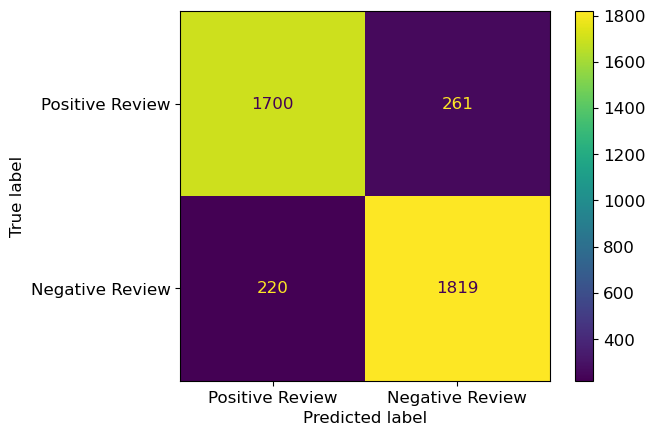

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, random_search.predict(X_test))

plt.rc('font', size=12) # bigger font sizes
ConfusionMatrixDisplay(cm, display_labels=["Positive Review", "Negative Review"]).plot()

### 2.10 Classification report
rubric={accuracy:3}

<div class="alert alert-info" style="color:black">
    
Print a classification report on the `X_test` predictions of your random search object's best model with measurements to 4 decimal places. Use this information to answer the questions:

1. What is the recall if we classify `1` as our "positive" class? 
2. What is the precision weighted average? Save the result to 4 decimal places. 
3. What is the `f1` score using `1` as your positive class?
4. Comment on the overall model performance in the context of what we used as input features.
    
</div>

In [81]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_test,
        random_search.predict(X_test),
        target_names=["+ review", "- review"],
        digits = 4
    )
)

              precision    recall  f1-score   support

    + review     0.8854    0.8669    0.8761      1961
    - review     0.8745    0.8921    0.8832      2039

    accuracy                         0.8798      4000
   macro avg     0.8800    0.8795    0.8796      4000
weighted avg     0.8799    0.8798    0.8797      4000



1. the recall for positive review is 0.8669
2. the precision weighted average is 0.8799
3. the f1 for positive review is 0.8797
4. All of those scores are around 0.88, which mean this model worked pretty good.

## Exercise 3: Model Interpretation <a name="4"></a>
<hr>

One of the primary advantage of linear models is their ability to interpret models in terms of important features. In this exercise, we'll explore the weights learned by logistic regression classifier.

Below we've create a dataframe that contains the words used in our optimal model along with their coefficients (if you named your `RandomizedSearchCV` object in question 2.5 something else than `random_search`, change the code below accordingly).

In [82]:
best_estimator = random_search.best_estimator_

coef_df = pd.DataFrame({
    'words': best_estimator[ "countvectorizer"].get_feature_names_out(),
    'coefficient': best_estimator["logisticregression"].coef_[0]
})

coef_df

,words,coefficient
0,00,-0.091365
1,000,-0.000781
2,007,0.025314
3,10,0.098615
4,100,0.211730
...,...,...
7455,zizek,-0.044152
7456,zoey,-0.119034
7457,zombie,-0.111114
7458,zombies,-0.169676


### 3.1 Get the most informative positive words
rubric={accuracy:1, reasoning:1}

<div class="alert alert-info" style="color:black">
    
Using the dataframe `coef_df` above, find the 10 words that are most indicative of a positive review.

Elaborate on the positive words here - Do they make sense with their target value?
    
</div>

In [83]:
coef_df.sort_values(by = 'coefficient',ascending=False)[0:10]

,words,coefficient
4861,perfect,0.695581
2382,excellent,0.692922
346,amazing,0.566943
3191,hilarious,0.566911
905,brilliant,0.554003
2976,great,0.537782
2283,enjoyed,0.513360
2531,favorite,0.499015
6772,today,0.496267
7368,wonderful,0.489379


All of them are complimentary words that make sense for the result.

### 3.2 Get the most informative negative words
rubric={accuracy:1, reasoning:1}

<div class="alert alert-info" style="color:black">
    
Using the dataframe `coef_df` above, find the 10 words that are most indicative of a negative review.

Elaborate on the negative words here - Do they make sense with their target value?
    
</div>

In [84]:
coef_df.sort_values(by = 'coefficient')[0:10]

,words,coefficient
7396,worst,-1.188358
7223,waste,-0.919264
584,awful,-0.826195
843,boring,-0.712444
6654,terrible,-0.665293
5008,poor,-0.663517
2483,fails,-0.614838
2118,dull,-0.576598
7395,worse,-0.562618
5009,poorly,-0.551959


They make sense too.

### 3.3 Explaining the coefficients?
rubric={reasoning:2}

<div class="alert alert-info" style="color:black">
    
Do the words associated with positive and negative reviews make sense? Why is it useful to get access to this information?
    
</div>

The coefficients represent people's emotional strength order for those review, and a relative high absolute value illustrates a higher positive or negative attitude. With those numbers, we can predict reviews with less computation resouces by only searching for the high rank words. Furthermore, we can find the ordinal level of emotions amoung words.

### 3.4 Using `predict` vs `predict_proba`
rubric={accuracy:3}

<div class="alert alert-info" style="color:black">
    
Make a dataframe named `results_df` that contains these 5 columns: 

- `review` - this should contain the reviews from `X_test`.
- `true_label` - This should contain the true `y_test` values. 
- `predicted_y` - The predicted labels generated from `best_model` for the `X_test` reviews using `.predict()`. 
- `neg_label_prob` - The probabilities of class `0` generated from `best_model` for the `X_test` reviews. These can be found at index 0 of the `predict_proba` output (you can get that using `[:,0]`). 
-  `pos_label_prob` - The probabilities of class `1` generated from `best_model` for the `X_test` reviews. These can be found at index 0 of the `predict_proba` output (you can get that using `[:,1]`). 
    
</div>

In [85]:
results_df = pd.DataFrame()
results_df['review'] = X_test
results_df['true_label'] = y_test
results_df['predicted_y'] = random_search.predict(X_test)
results_df['neg_label_prob'] = random_search.predict_proba(X_test)[:,0]
results_df['pos_label_prob'] = random_search.predict_proba(X_test)[:,1]
results_df

,review,true_label,predicted_y,neg_label_prob,pos_label_prob
8266,"There are movies that are leaders, and movies that are followers.<br /><br />""Meatballs"" was a leader. And here's one of its followers.<br /><br />""Party Camp"" is about as interchangeable as any of its brethern who plumbed the depths that ""Meatballs"" (the original) had so successfully mined. Of ...",0,0,0.605760,0.394240
12987,This wonderful movie really takes the time to step back and tell the story without words. The end of the movie contains almost no dialogue but what is in the minds of the characters is always perfectly clear. You know the film is not going to have a happy ending but you leave the film feeling ho...,1,1,0.155024,0.844976
16016,"Like The Jeffersons, Good Times was one of the those classic American sitcoms which was never aired in the UK, not to mention it came out in the 1970s- a decade where of which I wasn't born yet.<br /><br />But like most fans of the show, I watched a few episodes on You Tube- and afterwards, I lo...",1,1,0.000232,0.999768
16475,"Michael Radford has done an excellent job bringing this difficult play to the screen. He has taken a play with a reputation for anti-semitism, and shown us that Shakespeare knew quite well the humanity of the Jews. Radford said after the screening, and I agree, that Shylock is his first tragic h...",1,1,0.000248,0.999752
6277,"Producers Golan and Globus should have been ashamed to release this piece of trash publicly. I know this is gonna sound cliched, but compared to this, the first ""Hercules"" of 1983 looks like a mature and exciting epic! This ""sequel"" is moronic, cheap, unredeemable, childish, phony, inept and BAD...",0,0,0.885706,0.114294
...,...,...,...,...,...
13586,"Well, this is new...Famous Italian horror director Lucio Fulci shoots a film about a famous Italian horror director called...Lucio Fulci. After years and years of witnessing gruesome horror sequences, it becomes hard for Lucio to separate reality from fiction and he often hallucinates about comm...",1,0,0.557503,0.442497
12216,"For all the Homicide junkies out there, this movie was great! Every single character that ever was on the show made an appearance in the movie. It helped to resolve some (but not all) issues from the series. Unfortunately, unless you actually did watch the series, most of the enjoyment would be ...",1,0,0.751401,0.248599
14843,"For me, North and South (Books I&II) is the ultimate TV series of the 80's. Just spotting all those cameo appearances was highly entertaining.Gene Kelly, James Stewart, Elisabeth Taylor, Olivia De Havilland, Robert Mitchum, even Johny CashÂ¡ No series has come close to this achievement.Have you ...",1,1,0.014450,0.985550
4831,I would like to know who conned the producers of this movie to pay for its production - That persion is a genius of sorts. This movie somehow held my attention for about two thirds of it until I realized that it was going nowhere fast. I think the music managed to make it seem like something was...,0,0,0.965203,0.034797


### 3.5 Looking into the probability scores with positive reviews 
rubric={accuracy:2}

<div class="alert alert-info" style="color:black">
    
Find the top 5 movie reviews in `results_df` with the highest predicted probability of being positive (i.e., where the model is most confident that the review is positive). If you are curious to read these reviews, you can set the pandas column width or using `IPython.display.HTML` [using the tips in this so thread](https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver/)
    
</div>

In [86]:
pd.set_option('display.max_colwidth', None)
results_df.sort_values(by='pos_label_prob',ascending=False)[:5]

review  \
12661                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      That 70s Show is the best TV show ever, period. It's up there with the Andy Griffen Show, Saturday Night Live, and The Simpsons in my book. That 70s Show continued on for 8 seasons, all of which focus around a group of teenagers/young adults dealing with relationships, separating from their parents, and their overall futures.<br /><br />The two main characters, Eric and Donna, are two teenagers living next door to each other. They have been living next door to each other for most of their lives, and just begin to feel more feelings for each other at the beginning of the first season. A large amount of the show revolves around how their relationship is working.<br /><br />Two other characters, Red and Kitty, are Eric's parents. Red was in the service, so he really pushes Eric around. Kitty is just the opposite. Even though she drinks heavily, she treats Eric and his friends with a lot of care. Bob, their neighbor, is obviously Donna's Dad. Bob giggles around with several different women throughout the coarse of the show's story. Bob also annoys Red to his full extent.<br /><br />The remaining character, Hyde, Kelso, Fez, and Jackie, are Eric's friends. They also play a major role in the show's story.<br /><br />Well, the First Season is great. This is when the characters are beginning to feel new things for each other. The First Season is original, funny, and enjoyable.<br /><br />The Second Season is good, although it isn't as good as the first. It is a basic continuation of

### 3.6 Looking into the probability scores with negative reviews 
rubric={accuracy:2}

<div class="alert alert-info" style="color:black">
    
Find the top 5 movie reviews in `results_df` with the highest predicted probability of being negative (i.e., where the model is most confident that the review is negative).
    
</div>

In [87]:
pd.set_option('display.max_colwidth', None)
results_df.sort_values(by='neg_label_prob',ascending=False)[:5]

review  \
8297                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Less than 10 minutes into this film I wanted it to end as it was painful. All this "horror" movie was about was a group of whiny bitches doing stupid things for 90 minutes, arguing, crying and screaming. Do not let the positive reviews fool you as this really is a terrible movie and you really shouldn't watch it.<br /><br />The movies plot had potential to be something great, but it just doesn't happen. A group of five "teenage" girls are driving home one night when they find themselves being pursued by a crazed female driver who wants to kill them. Two minutes into the movie, and the characters are already arguing and this doesn't stop. All we have for 90 minutes is a bunch of girls whining, crying, screaming, "acting" and arguing. None of the dialogue is even remotely interesting too, so you don't get to really know these characters or enjoy them.<br /><br />The acting was terrible and I was shocked to find out that these characters were meant to be teenagers. None of these women looked a day under 20, and one of them easily looked like she was nearly 30 years old. At least get people who look the age. None of them gave even remotely decent performances, and just seemed like they were picked off the street or were friends of the director with no acting abilities. The "actress" who played the killer overdone it, but she at least showed something that the other girls didn't - a little bit of talent.<br /><br />The characters don't help things because these girls are a bunch of whiny, stupid bitches. That is all I can really say about them, and it did not help that they ALL survived. If I have to go into detail, in one scene the girls are being chased by the killer and having their car knocked a lot. One girl injures herself 

### 3.7 Looking at uncertain reviews
rubric={accuracy:2}

<div class="alert alert-info" style="color:black">
    
Find the 5 movie reviews in the test set with the most divided probability of being negative or positive (i.e., where the model is least confident in either review sentiment).

What do you think could contribute to the model being confused for how to score a review?
    
</div>

In [88]:
pd.set_option('display.max_colwidth', None)
results_df['divided'] = np.abs(results_df['pos_label_prob'] - 0.5)
results_df.sort_values(by='divided')[:5]

,review,true_label,predicted_y,neg_label_prob,pos_label_prob,divided
15768,"I'm sure this is a show no one is that familiar of and might not think good of it; after all it is almost close to Baywatch Hawaii. With the cast, the location, style of the directing and its publicity Â? shows women walking around on the beach and all that. No wonder people have misconception and decide not to watch it.<br /><br />It was wrong of them to do that. Cause after I decide to watch the show, there are actually more thing going on, real juicy story and conflict, turn out to be really exciting to watch and pretty much Â? addictive.<br /><br />The story of the hotel clerks, the manager, the owner and their complicated love life. Also enter the troublesome hotel's visitor and powerful man trying to steal the hotel. It actually more exciting than it sounds here.<br /><br />I won't deny that the acting suck but it ain't that bad that you'll look away. The story is not so consistence but good enough. The soundtrack is fitting pretty well with the scenario and the action is all the time. I took me couple of episode before there is actually anything happen solidly so be patience.<br /><br />Recommendation: I Really Do Enjoy Watching This. Zillion Times Better Than Expected.<br /><br />Rating: 7.5/10 (Grade: B)<br /><br />Please Rate My Review After Reading It, Thanks.",1,0,0.500139,0.499861,0.000139
10690,"If you're even mildly interested in the War between the States, this film is worth watching. It is great historical story telling. No flashing sabres, no cavalry charges, no carnage -- just the story of a sorry group of Union soldiers stumbling into the farm of a Confederate woman and her son and taking as much as their captain's conscience allows. This quantity moves up and down as events unfold affecting his sense of humanity in conflict with his sense of duty to his men and his cause. Ultimately, he reaches a compromise that any of us would be hard put to top. <br /><br />I appreciate the historical treatment of the war in Kentucky, a slave state that tried to stay neutral but eventually opted to remain in the Union under mysterious political circumstances involving the detention of certain legislators. Roughly half the soldiers from Kentucky fought for each side, but there's never been much treatment of what it was like to have lived there through those times. This film makes a great contribution simply in the ""look and feel"" of the time and place.",1,1,0.499555,0.500445,0.000445
671,"I was prepared to love ""Where's Poppa"", it features the nexus of Normal Lear sitcom character actors who, when I was growing up, felt like extended members of my raisenette-sized broken nuclear family. How fun it would be to see censor-free Barnard Hughes, Vincent Gardenia, Ron Liebman, Rob Reiner, and a pre-SNL Garret Morris.<br /><br />But alas,""Where's Poppa"" drags. It's claustrophobic and plodding, and breaks the cardinal rules of farce, lightness of mood and a fast pace.<br /><br />The plot involves the efforts of a lawyer (George Segal) to rid himself of his overbearing Jewish mother, who lives in his gigantic New York apartment. Along the way we are exposed ridiculous characters and situations: a comedic group of muggers who repeatedly mug the brother of the main character, the rape of a policeman which involving a gorilla suit and subsequent gay love, Ruth Gorden pulling down Segal's pants and biting his ass as he serves her dinner. Why doesn't this work? Part of the explanation is the sense of doom engendered by the cramped, dark interiors and antique set-decoration. I absolutely eat up cinematography of New York during this era, but watching this movie felt like I was leafing through the Police Gazette in a dark bus terminal.<br /><br />The main reason though is the slow pace. Modern MTV-style quick cuts have changed what moviegoers feel is a comfortable editing tempo, but, even taking this into consideration, camera shots are held for an excessiv

Reviews with both negative and postive expressions could confuse the model.

### 3.8 Looking at wrongly predicted reviews
rubric={accuracy:1,reasoning:1}

<div class="alert alert-info" style="color:black">
    
Examine a review from the test set where our `best_model` is making mistakes, i.e., where the true labels do not match the predicted labels. 

What do you think could contribute to the model making an incorrect classification for a review?
    
</div>

In [89]:
results_df.loc[results_df.true_label != results_df.predicted_y]

,review,true_label,predicted_y,neg_label_prob,pos_label_prob,divided
11628,"And that's saying a lot. Rent this if you want to be staggered by oddness, blown away by one of the most bizarre scripts, direction, and casting in the history of films. I'm staggered. I can't believe I watched it. I'm a big Bernadette Peters fan, normally- but this tested my resolve. Don't read any more reviews here, it's best if you know nothing about the plot. Just rent it. You won't believe what you're seeing.......",1,0,0.772169,0.227831,0.272169
2481,"'Maladolescenza' has the air of a dark fairy tale, with its child protagonists, forest setting, and the discovery of a castle's ruins. Yet at its core, the film is essentially an unusual psychosexual study of adolescents. Opening with a dream sequence employing the not-so-subtle metaphor of Fabrizio wrestling with his menacing hound, the film details his psychological persecution of Laura, the girl who has pledged her love to him, and his eventual romance with the equally malicious Sylvia. The film's psychological complexities do give the film merit, yet there's no doubting how unnecessarily exploitive the film is in its depiction of nudity and sex. The film's look relies more on its gorgeous locations rather than particular cinematographic skill, and there's no doubting the film's greatest asset is the creepy, children's choir-augmented soundtrack. With its odd dreamlike quality, the film is at best interesting, yet pales beside Louis Malle's surreal and brilliant 'Black Moon' from the same era. Certainly deserving of the art versus pornography debate, for unlike many banned films, Pasolini's 'Salo' or Larry Clark's 'Ken Park' for instance, the film is rather unremarkable from an artistic perspective. Cinema seems to be gradually losing its ability to shock, so perhaps 'Maladolescenza' should be admired for retaining that power thirty years after its release. However shock value is the one reason alone the film is memorable. <br /><br />The film does have its defenders. Yet so does Nazism.",0,1,0.009902,0.990098,0.490098
2756,"Was this movie stupid? Yup. Did this movie depth? Nope. Character development? Nope. Plot twists? Nope. This was simply a movie about a highly-fictionalized Springer show. It shows the lengths that some people will go to get their mugs on TV. Molly Hagan did a great job as Jaime Pressly's mom. Jaime is....well...GORGEOUS! This flick wasn't so much made to be a ""breakthrough"" movie, rather, it was intended to life in a trailer park (I live in a trailer park and ours is nothing like the one in this movie) where everyone sleeps with everyone else, all the girls get pregnant by different guys, and all the guys drive rusted-out '66 Ford pickups (exaggeration, of course, but that's the picture everyone sees when you mention ""trailer park""). Some people over-analyze movies (case-in-point: Star Trek freaks). I watch movies purely for the entertainment value; not to point out that the girl is wearing a different shirt in a different scene (read the ""Goofs"" bit about Connie's shirt. Could it have been better? Sure. But it was funny as hell.",0,1,0.218062,0.781938,0.281938
2506,"This sequel to ""In the Heat of the Night"" will suffer in inevitable comparisons to its infinitely better predecessor. Instead of looking like a theatrical movie edited for television, ""Mister Tibbs"" looks suspiciously like a TV movie edited for theatrical release, with grainy photography, cheesy opening titles, and sets that look like they're made of plywood. The murder sequence has a glaring continuity error: the camera shows two hands choking the girl, then a shot of a hand reaching for a statuette, then a shot of the girl being choked with two hands again, and finally the statuette coming down for the fatal blow. Solving the case should be easy: find the only guy with three hands! But the shoddy production values can't completely obscure this film's considerable merits: namely, Sidney Poitier's perf

When positive reviews contain some strong negative words like horrible and resolve, the algorithm tended to make mistakes. Vice versa.

### Submission to Canvas

**PLEASE READ: When you are ready to submit your assignment do the following:**

- Read through your solutions
- **Restart your kernel and clear output and rerun your cells from top to bottom** 
- Makes sure that none of your code is broken 
- Convert your notebook to .html format by going to File -> Export Notebook As... -> Export Notebook to HTML
- Upload your `.ipynb` file and the `.html` file to Canvas under Assignment1. 
- **DO NOT** upload any `.csv` files. 

### Congratulations on finishing Assignment 3!